# Analysing and Cleaning

This is a preliminary rough undertaking to analyse and understand which googleplaystore apps earn revenue and which attributes define success. We have a dataset of 10841 apps of all languages.

In [418]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import skew

In [341]:
#Reading file
googleplay = pd.read_csv('E:\Imps\PlayStore\googleplaystore.csv')
googleplay_reviews = pd.read_csv('E:\Imps\PlayStore\googleplaystore_user_reviews.csv')

The given googleplay dataset has the following features

In [342]:
googleplay.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [343]:
googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [345]:
googleplay.shape

(10840, 13)

In [346]:
googleplay.describe()
googleplay.drop([10472])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Googleplay_user_reviews contains the following data

In [347]:
googleplay_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [348]:
googleplay_reviews.shape

(64295, 5)

# Plotting Relations

Plotting various attribute realations to better understand the given dataset

In [349]:
googleplay.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

Obtaining the ratio of free apps to that of total apps in playstore

In [350]:
count_Free = 0
count_Paid = 0
count_Na = 0

for i in googleplay["Type"]:
    if i == "Free":
        count_Free += 1
    elif i == "Paid":
        count_Paid += 1
    else:
        count_Na +=1

print("Free AppRatio = "+ str(count_Free/len(googleplay.loc[: , "Type"])))

print("Paid AppRatio = "+ str(count_Paid/len(googleplay.loc[: , "Type"])))

print("Missing values = "+ str(count_Na))

Free AppRatio = 0.9261070110701107
Paid AppRatio = 0.07380073800738007
Missing values = 1


In [351]:
Type_list = list(googleplay.loc[:,"Type"])

Type_list = list(set(Type_list))
Type_list

ValueError: list.remove(x): x not in list


From the pieplot we can determine that most of the apps on the playstore are Free and use other sources of revenues such as in-app advertisements to earn revenue. 

Only about 7.4% of the apps are pay to install.

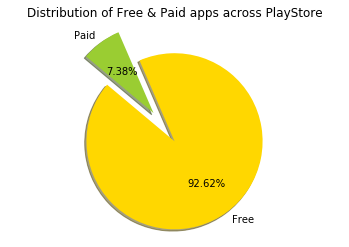

In [352]:
# Data to deploy

labels = Type_list[0:2]
sizes = [count_Free, count_Paid]
colors = ['gold', 'yellowgreen']
explode = (0, 0.4) 

# Plotting

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Distribution of Free & Paid apps across PlayStore")
plt.show()

In [353]:
googleplay['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

Number of distinct Categories of Apps

In [356]:
gh = list(googleplay.Genres.unique())
gh1 = [i.split(';', 1)[0] for i in gh]
gh1 = set(gh1)
gh1

{'Action',
 'Adventure',
 'Arcade',
 'Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Board',
 'Books & Reference',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Educational',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photography',
 'Productivity',
 'Puzzle',
 'Racing',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social',
 'Sports',
 'Strategy',
 'Tools',
 'Travel & Local',
 'Trivia',
 'Video Players & Editors',
 'Weather',
 'Word'}

In [357]:
print(len(gh1))

48


In [358]:
count_fam = 0
count_game = 0
count_tool = 0
count_med = 0
count_Others = 0

for i in googleplay["Category"]:
    if i == "FAMILY":
        count_fam += 1
    elif i == "GAME":
        count_game += 1
    elif i == "TOOLS":
        count_tool += 1
    elif i == "MEDICAL":
        count_med += 1
    else:
        count_Others += 1

print("Ratio of top three Categories to the total \t")
print(" = "+ str((count_fam + count_game + count_tool + count_med)/len(googleplay.loc[: , "Category"])))

Ratio of top three Categories to the total 	
 = 0.4079335793357934


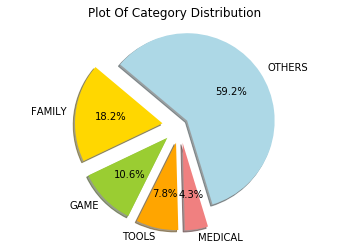

In [398]:
Category_list = ["FAMILY",'GAME','TOOLS','MEDICAL','OTHERS']

# Data to deploy

labels = Category_list
sizes = [count_fam, count_game, count_tool, count_med, count_Others]
colors = ['gold', 'yellowgreen', 'orange', 'lightcoral' ,'lightblue']
explode = (0.2, 0.2, 0.2, 0.2, 0.1)

# Plotting

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Plot Of Category Distribution")
plt.show()


# Filtering Non English Apps

In [360]:
#Defining function to check if an app is english or not

def is_English(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True

In [361]:
#Dropping non English Apps

for i in googleplay.iloc[:,0]:
    if is_English(i):
        continue
    m = googleplay[googleplay['App']==i].index.values.astype(int)[0]
    gfiltered = googleplay.drop(googleplay.index[m])


In [362]:
gfiltered = gfiltered.drop_duplicates()

In [363]:
gfiltered.shape

(10356, 13)

Analysing the paid apps

In [364]:
App_Price = []

for i in list(gfiltered["Price"]):
    if i == 0:
        continue
    else:
        num_price = i[1:]
        App_Price.append(num_price)

App_Price = list(filter(None, App_Price))

len(App_Price)

765

In [394]:
App_Price2 = []

for i in App_Price:
    App_Price2.append(float(i))


{'whiskers': [<matplotlib.lines.Line2D at 0x1d150a38e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d151dcc5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d152d27278>],
 'medians': [<matplotlib.lines.Line2D at 0x1d150a38da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d151dcc2e8>],
 'means': []}

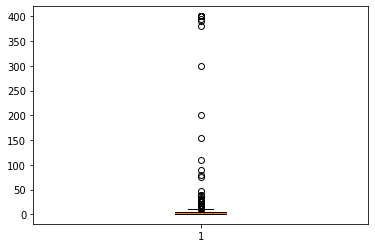

In [395]:
gfiltered["Price"]

plt.boxplot(App_Price2)

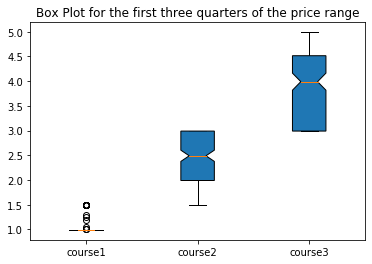

In [396]:
Price1 = []
Price2 = []
Price3 = []
Price4 = []

App_Price2.sort()

val = len(App_Price2)

Price1 = App_Price2[0:round(val/4)]
Price2 = App_Price2[round(val/4):round(val/2)]
Price3 = App_Price2[round(val/2):round((3*val)/4)]
Price4 = App_Price2[round((3*val)/4):val]

box_plot_data = [Price1, Price2, Price3]
plt.boxplot(box_plot_data,notch='True',patch_artist=True,labels=['course1','course2','course3'])
plt.title("Box Plot for the first three quarters of the price range")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d153107940>,
 'caps': [<matplotlib.lines.Line2D at 0x1d151deb9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d151deb6d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1530ae358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1530ae3c8>],
 'means': []}

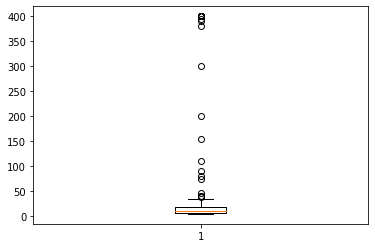

In [397]:
plt.boxplot(Price4)

By analysing the box plots, we can deduce that most of the data points (Prices) of the first three quarters of the Price data lie very near to their respective medians and there is very little spread.

However, this is not the case for the fourth quarter of our price range, by observation some apps charge an exhorbitant amount.

In [402]:
ran = max(App_Price2) - min(App_Price2)
intervals = math.sqrt(len(App_Price2))
width = ran/intervals

In [405]:
intervals

27.65863337187866

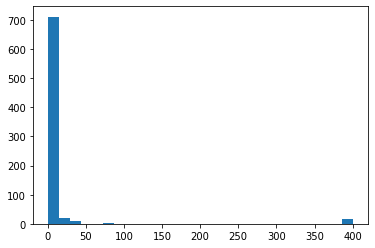

In [414]:
x = plt.hist(App_Price2, bins = round(intervals))